## Interpretations of coefficients in non-linear models  

In [2]:
library(tidyverse)
library(caret)
Sys.setenv(LANG = "en")

### Logarithmic and semi-logarithmic models

- $y_i = \beta_1 + \beta_2* x_i+ u_i$
    - $\dfrac{dy_i}{dx_i} = \beta_2$
    - x increases by 1 => y increases by $\beta$ 
- $log(y_i) = \beta_1 + \beta_2* log(x_i) + u_i$
    - $\dfrac{d \ln y_i}{d \ln x_i} = \dfrac{100 * d y_i / y_i}{100 * d  x_i / x_i}  = \beta_2$
    - x increases by 1% => y increases by $\beta$ %
- $y_i = \beta_1 + \beta_2* log(x_i) + u_i$
    - $\dfrac{d y_i}{d \ln x_i} = \beta_2$
    - $\dfrac{d y_i }{100 *  d  x_i / x_i} = \beta_2 / 100 $
    - x increases by 1% => y increases by $\beta/100$ 
- $log(y_i) = \beta_1 + \beta_2* x_i + u_i$
    - $\dfrac{100 * d y_i / y_i}{d  x_i } = 100 * \beta_2$
    - x increases by 1 => y increases by $100 \beta$ % 


### Models with quadratic and interactive terms

Models with quadratic terms

$Y=\beta_{1}+\beta_{2} X_{2}+\beta_{3} X_{2}^{2}+\epsilon$

$\frac{\mathrm{d} Y}{\mathrm{d} X_{2}}=\beta_{2}+2 \beta_{3} X_{2}$

- What this shows is that $\beta_{2}$ gives the rate of change when $x$ is equal to zero. 
- It tells both the direction and steepness of the curvature (a positive value indicates the curvature is upwards while a negative value indicates the curvature is downwards).

$Y=\beta_{1}+\left(\beta_{2}+\beta_{3} X_{2}\right) X_{2}+u$

- The coefficient $\beta_{3}$ tells a rate of change of $X_{2}$ per unit change of $X_{2}$. 

In [3]:
df <- mtcars
head(df)
?mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [4]:
## possibly more meaningful, e.g., for summary() or bivariate plots:
mtcars2 <- within(mtcars, {
   vs <- factor(vs, labels = c("V", "S"))
   am <- factor(am, labels = c("automatic", "manual"))
   cyl  <- ordered(cyl)
   gear <- ordered(gear)
   carb <- ordered(carb)
})
summary(mtcars2)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec       vs             am     gear   carb  
 Min.   :1.513   Min.   :14.50   V:18   automatic:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   S:14   manual   :13   4:12   2:10  
 Median :3.325   Median :17.71                         5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                                4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                                6: 1  
 Max.   :5.424   Max.   :22.90                                8: 1  

In [5]:
df <- df[,-(8:9)]

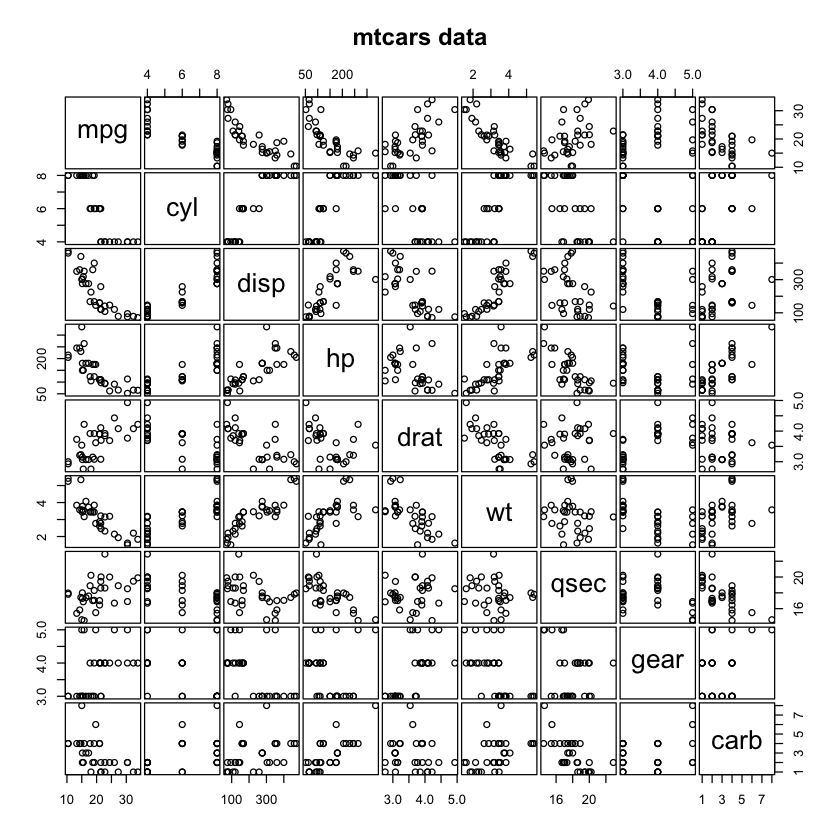

In [6]:
require(graphics)
pairs(df, main = "mtcars data", gap = 1/4)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




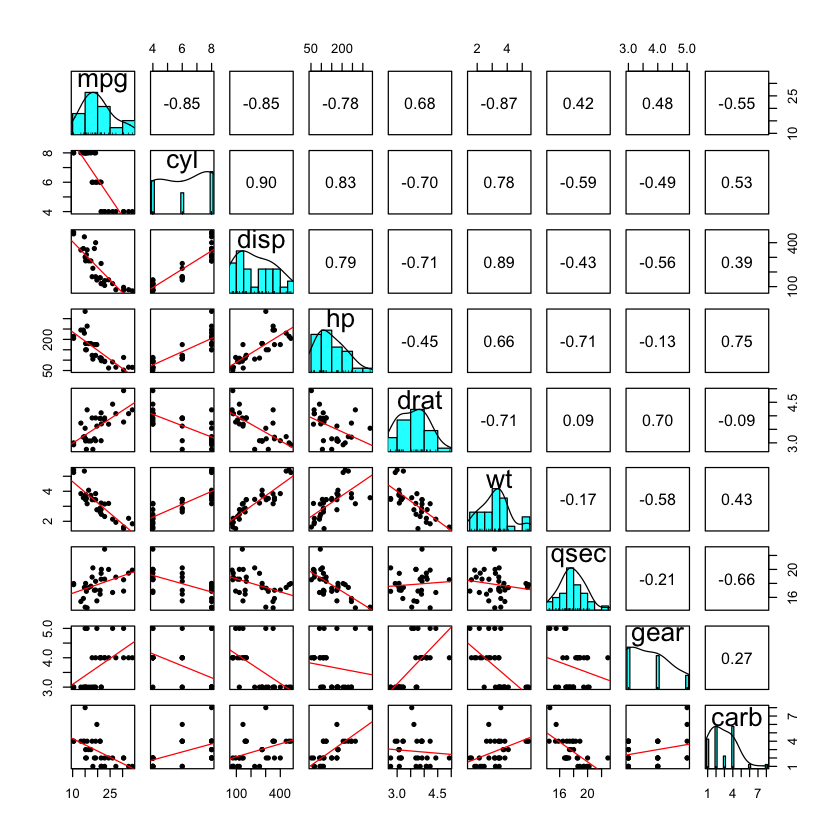

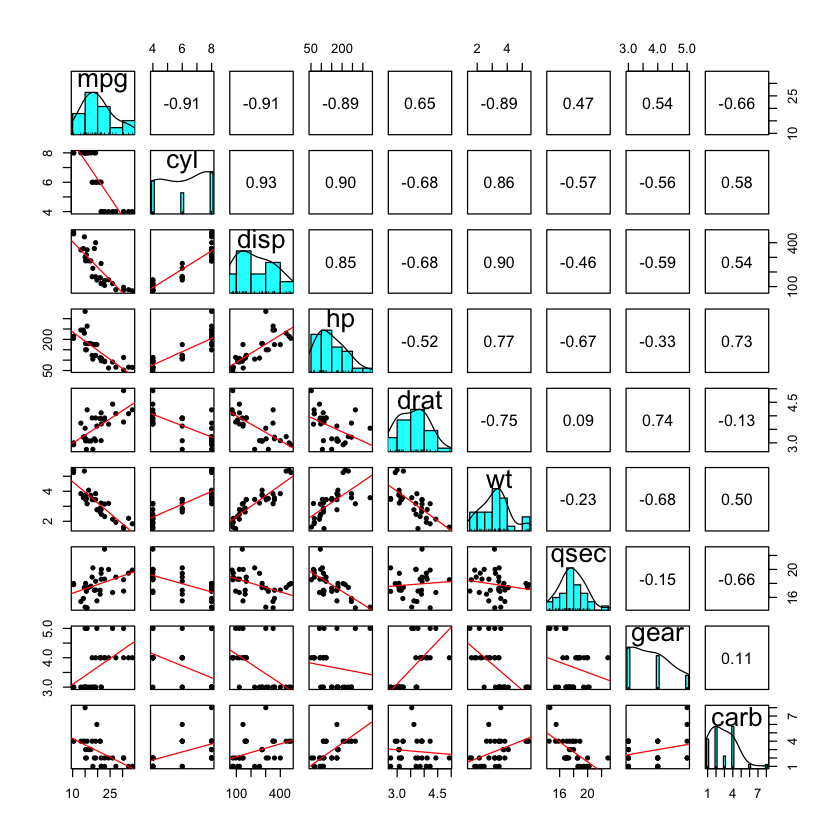

In [7]:
library(psych)
pairs.panels(df, lm=T, ellipses=F, method = 'pearson', breaks="Sturges")
pairs.panels(df, lm=T, ellipses=F, method = 'spearman', breaks="FD")

In [ ]:
# about dummies
# coplot(mpg ~ disp | as.factor(cyl), data = df, panel = panel.smooth, rows = 1)
# coplot(mpg ~ disp | as.factor(gear), data = df, panel = panel.smooth, rows = 1)
# coplot(mpg ~ disp | as.factor(carb), data = df, panel = panel.smooth, rows = 1)

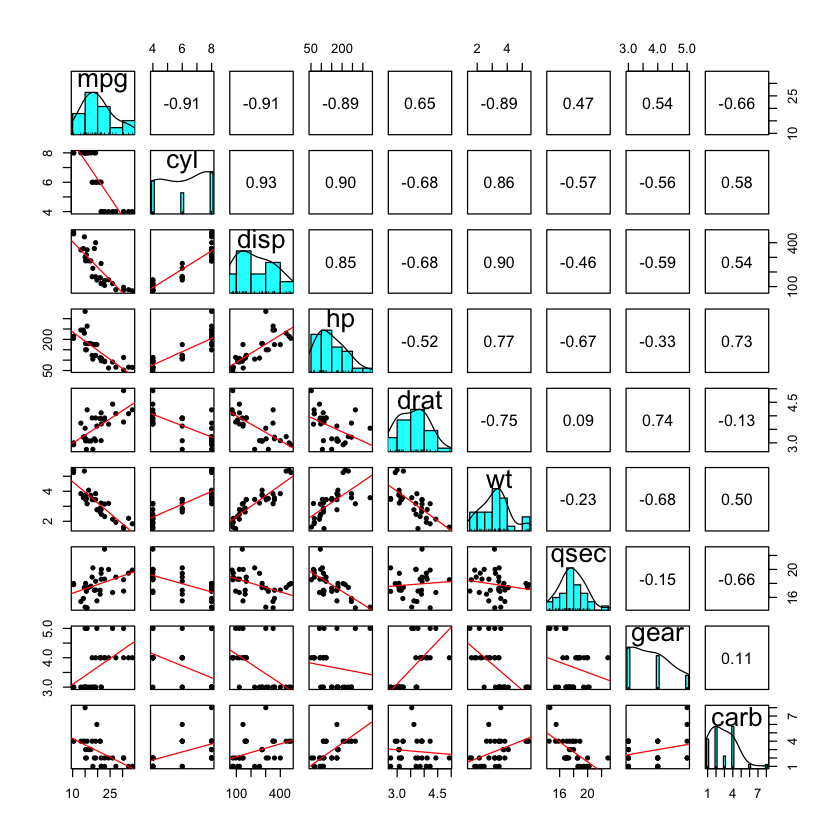

In [8]:
pairs.panels(df, lm=T, ellipses=F, method = 'spearman', breaks="FD")

In [9]:
lm1 <- lm(mpg~disp, data = df)
summary(lm1)


Call:
lm(formula = mpg ~ disp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8922 -2.2022 -0.9631  1.6272  7.2305 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.599855   1.229720  24.070  < 2e-16 ***
disp        -0.041215   0.004712  -8.747 9.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.251 on 30 degrees of freedom
Multiple R-squared:  0.7183,	Adjusted R-squared:  0.709 
F-statistic: 76.51 on 1 and 30 DF,  p-value: 9.38e-10


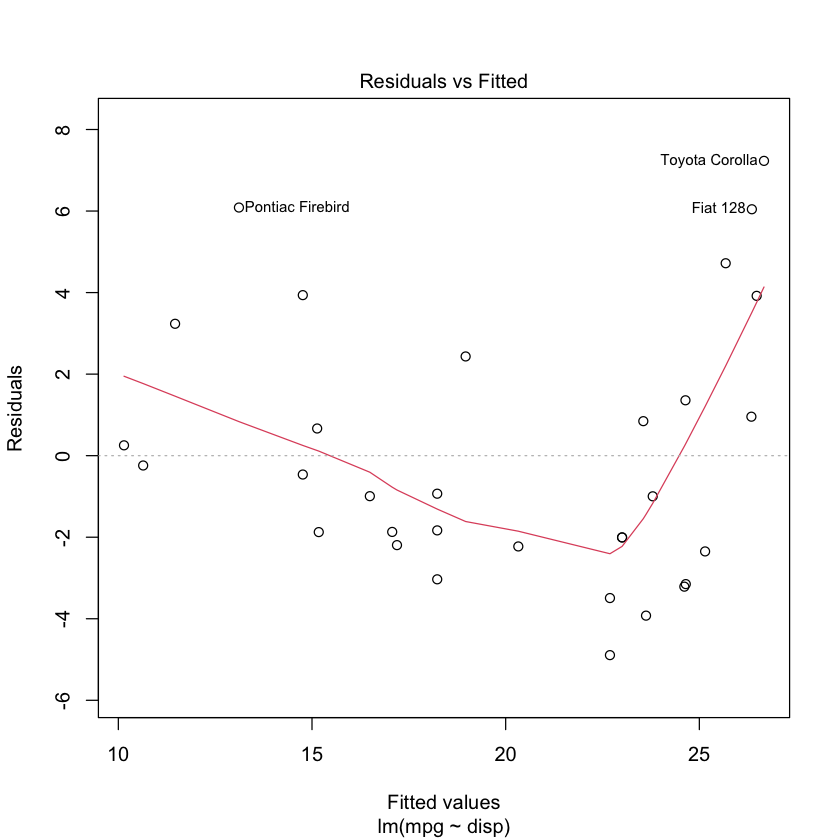

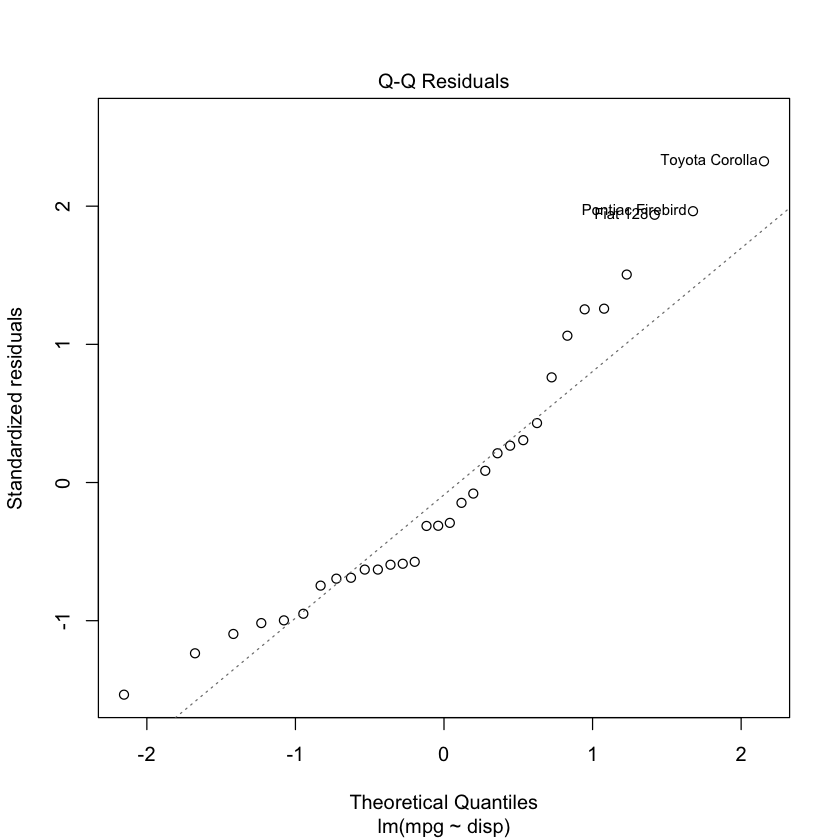

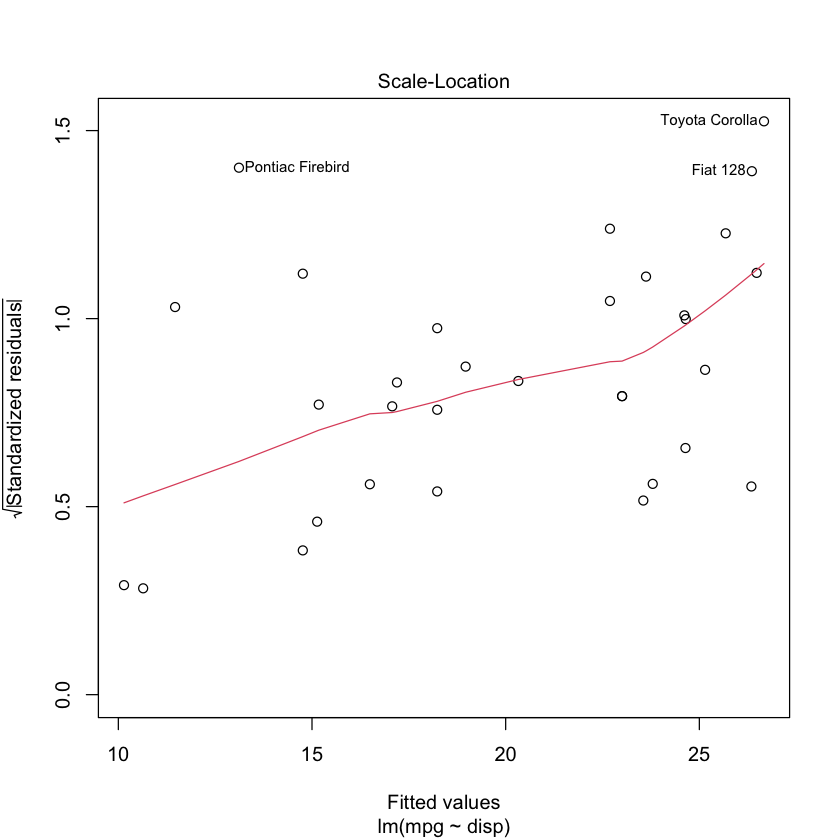

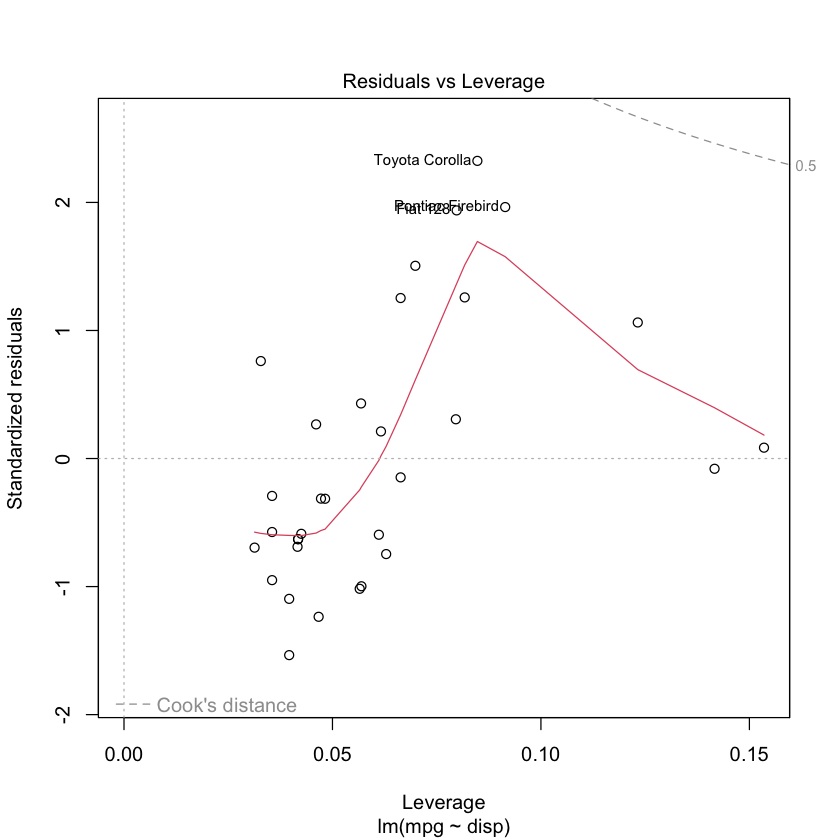

In [10]:
plot(lm1)

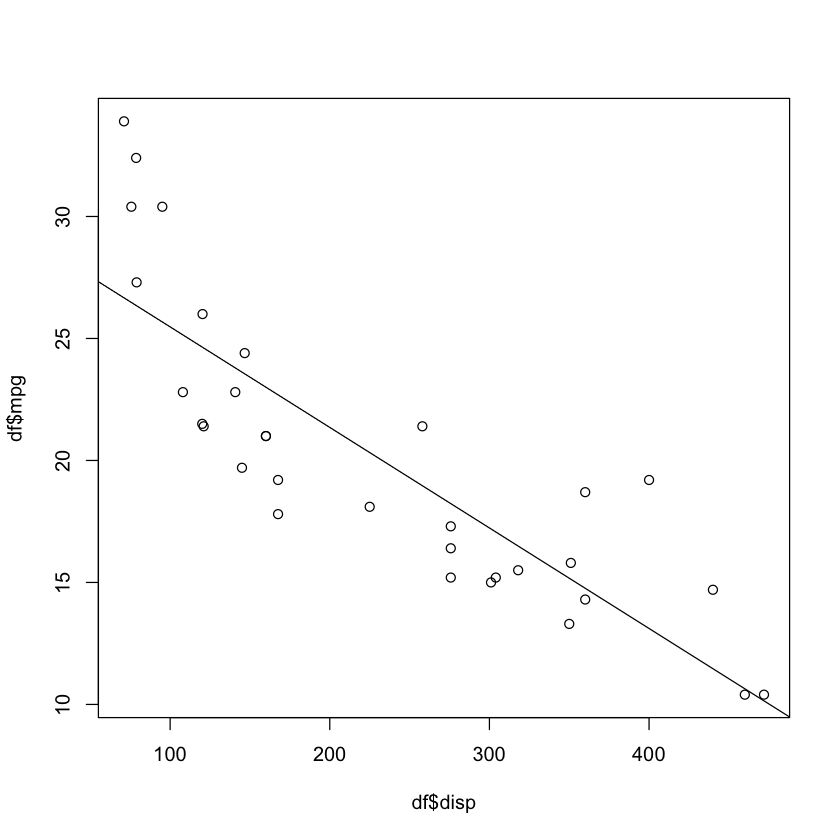

In [11]:
plot(df$disp,df$mpg)
abline(lm1)

In [12]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [13]:
library('sandwich')

In [14]:
bptest(lm1, ~ disp + I(disp^2), data = mtcars)


	studentized Breusch-Pagan test

data:  lm1
BP = 5.9271, df = 2, p-value = 0.05163


In [15]:
bgtest(lm1, order = 1)
bgtest(lm1, order = 2)
bgtest(lm1, order = 3)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm1
LM test = 4.9458, df = 1, p-value = 0.02615



	Breusch-Godfrey test for serial correlation of order up to 2

data:  lm1
LM test = 4.9574, df = 2, p-value = 0.08385



	Breusch-Godfrey test for serial correlation of order up to 3

data:  lm1
LM test = 4.9577, df = 3, p-value = 0.1749


In [16]:
lm1$residuals

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
         -2.0054356          -2.0054356          -2.3486218           2.4336462 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          3.9375884          -2.2264528          -0.4624116           0.8464033 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
         -0.9967659          -3.4922007          -4.8922007          -1.8327247 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
         -0.9327247          -3.0327247           0.2536819          -0.2408996 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
          3.2347980           6.0437752           3.9201298           7.2305403 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
         -3.1499188          -0.9934466          -1.8704583          -1.8745628 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          6.0861932           0.9561397           1.3583242           4.7197032 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
          0.6666524          -3.9236624          -2.1941036          -3.2128252

In [17]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



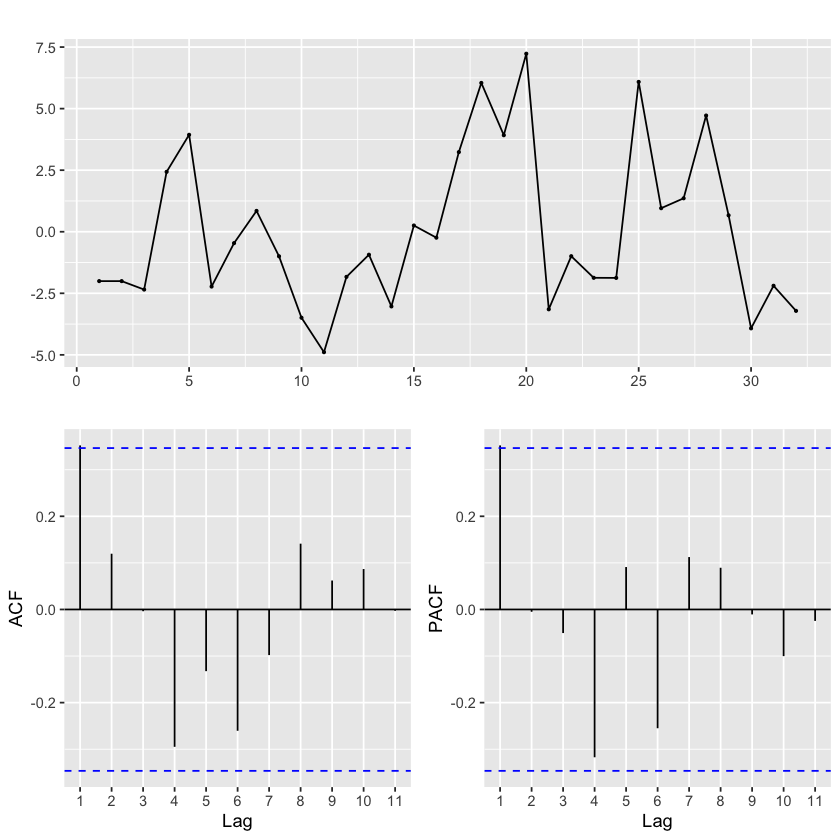

In [18]:
ggtsdisplay(lm1$residuals)

In [19]:
order(df[['disp']])

[1] 20 19 18 26 28  3 21 27 32  9 30  8  1  2 10 11  6  4 12 13 14 31 23 22 24
[26] 29  5  7 25 17 16 15

In [20]:
ressort = lm1$residuals[order(df[['disp']])]

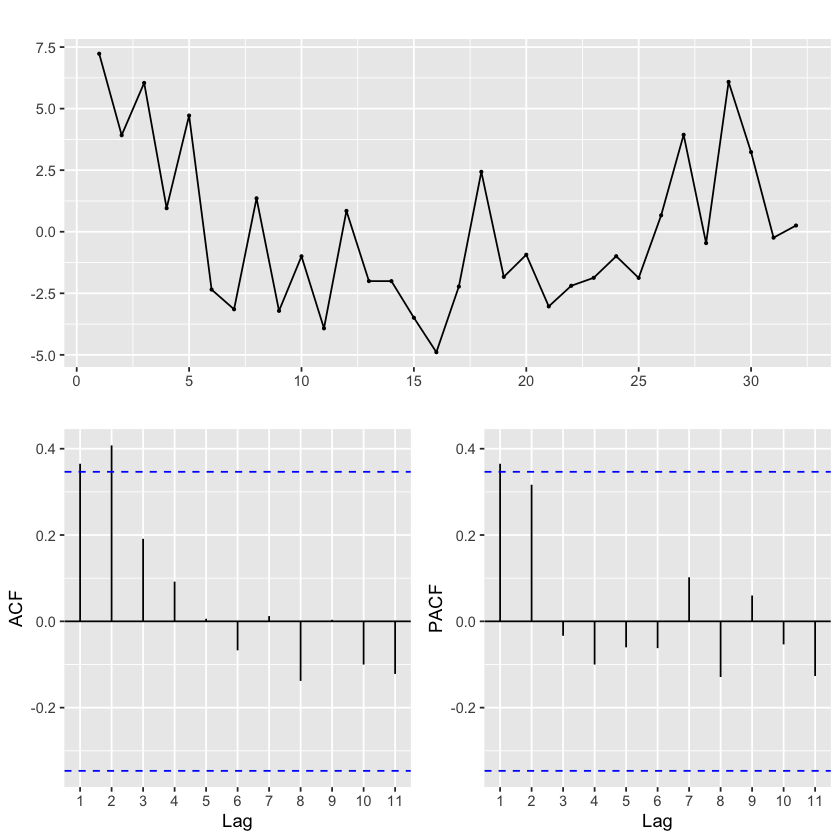

In [21]:
ggtsdisplay(ressort)

In [23]:
bgtest(lm1, order = 1, order.by = df$disp)
bgtest(lm1, order = 2, order.by = df$disp)
bgtest(lm1, order = 3, order.by = df$disp)
bgtest(lm1, order = 4, order.by = df$disp)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm1
LM test = 4.2696, df = 1, p-value = 0.0388



	Breusch-Godfrey test for serial correlation of order up to 2

data:  lm1
LM test = 7.0506, df = 2, p-value = 0.02944



	Breusch-Godfrey test for serial correlation of order up to 3

data:  lm1
LM test = 7.0784, df = 3, p-value = 0.06944



	Breusch-Godfrey test for serial correlation of order up to 4

data:  lm1
LM test = 7.3981, df = 4, p-value = 0.1163


In [24]:
df['disp2'] <- df['disp']^2 
lm2 <- lm(mpg~disp+disp2, data = df)
summary(lm2)


Call:
lm(formula = mpg ~ disp + disp2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9112 -1.5269 -0.3124  1.3489  5.3946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.583e+01  2.209e+00  16.221 4.39e-16 ***
disp        -1.053e-01  2.028e-02  -5.192 1.49e-05 ***
disp2        1.255e-04  3.891e-05   3.226   0.0031 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.837 on 29 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7784 
F-statistic: 55.46 on 2 and 29 DF,  p-value: 1.229e-10


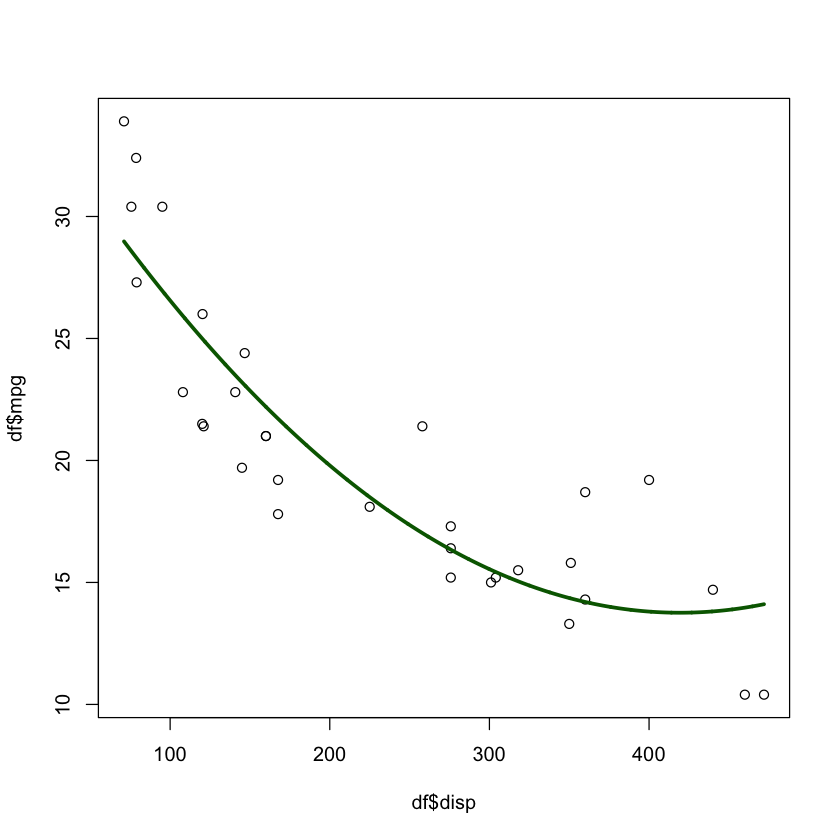

In [25]:
plot(df$disp,df$mpg)
disp_p <- seq(min(df$disp), max(df$disp), 0.1)
predict_p <- predict(lm2,list(disp=disp_p, disp2=disp_p^2))
lines(disp_p, predict_p,  col = "darkgreen", lwd = 3)

In [26]:
bptest(lm2)


	studentized Breusch-Pagan test

data:  lm2
BP = 4.676, df = 2, p-value = 0.09652


In [27]:
bgtest(lm2, order = 1, order.by = df$disp)
bgtest(lm2, order = 2, order.by = df$disp)
bgtest(lm2, order = 3, order.by = df$disp)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm2
LM test = 0.79849, df = 1, p-value = 0.3715



	Breusch-Godfrey test for serial correlation of order up to 2

data:  lm2
LM test = 2.0664, df = 2, p-value = 0.3559



	Breusch-Godfrey test for serial correlation of order up to 3

data:  lm2
LM test = 2.246, df = 3, p-value = 0.5229


We have already seen that the estimate of the
intercept may have no sensible meaning if $X_2 = 0$ is outside the data range.

So the trick is to place the zero value within the range of our data. We will do this by centering the $x$, that is, we will subtract the mean of $x$ from each value. 
You note that the coefficient for the quadratic term are unchanged while the coefficient for the linear better reflect the linear relation.

In [ ]:
df['dispc'] <- df['disp'] - mean(df['disp'],na.rm = T) 

In [ ]:
mean(df[['disp']],na.rm = T) 

In [ ]:
df['dispc'] <- df['disp'] - mean(df[['disp']]) 
df['dispc2'] <- df['dispc']^2
lm3 <- lm(mpg~dispc+dispc2, data = df)
summary(lm3)
summary(lm2)

In [ ]:
plot(df$dispc,df$mpg)
dispc_p <- seq(min(df$dispc), max(df$dispc), 0.1)
predict_p <- predict(lm3,list(dispc=dispc_p, dispc2=dispc_p^2))
lines(disp_p, predict_p,  col = "darkgreen", lwd = 3)

In [ ]:
plot(log(df$disp),df$mpg)

In [ ]:
lm4 <- lm(mpg~log(disp), data = df)
summary(lm4)

In [ ]:
?mtcars

Models with interactive terms

$Y=\beta_{1}+\beta_{2} X_{2}+\beta_{3} X_{3}+\beta_{4} X_{2} X_{3}+u$

$Y=\beta_{1}+\left(\beta_{2}+\beta_{4} X_{3}\right) X_{2}+\beta_{3} X_{3}+u$

This representation makes explicit the fact that $(\beta_2 + \beta_4 X_3 )$, the marginal effect of $X_2$ on $Y$, depends on the value of $X_3$, From this it can be seen that the interpretation of $\beta_2 $ has a special interpretation. It gives the marginal effect of $X_2$ on $Y$, when $X_3 = 0$.

If $X_3 = 0$ is a long way outside the range of $X_3$ in the sample, the interpretation of the estimate of $\beta_2 $ as an estimate of the marginal effect of $X_2$ when $X_3 = 0$
should be treated with caution. Sometimes the estimate will be completely
implausible, in the same way as the estimate of the intercept in a regression
is often implausible if given a literal interpretation.

##  RESET test


Ramsey RESET (Regression Equation Specification Error Test) for functional misspecification

More specifically, it tests whether non-linear combinations of the fitted values help explain the response variable.

The intuition behind the test is that if non-linear combinations of the explanatory variables have any power in explaining the response variable, the model is misspecified in the sense that the data generating process might be better approximated by a polynomial or another non-linear functional form. 

$
H_{0}: y_{i}=\beta_{1}+\beta_{2} x_{i}+\beta_{3} z_{i}+\varepsilon_{i}
$

$H_a:$ model is misspecified

- Step 1: estimate $y_{i}=\beta_{1}+\beta_{2} x_{i}+\beta_{3} z_{i}+\varepsilon_{i}$
- Step 2: calculate fitted $\hat{y}$
- Step 3: test then tests whether any of $\hat{y}^2$, ... ,$\hat{y}^k$  has any power in explaining y:  
$$y_{i}=\beta_{1}+\beta_{2} x_{i}+\beta_{3} z_{i}+\gamma_{1} \hat{y}_{i}^{2}+\gamma_{2} \hat{y}_{i}^{3}+\ldots+\gamma_{p} \hat{y}_{i}^{p+1}+\varepsilon_{i}$$
- Step 4: F-test whether $ \gamma_{1} = ... = \gamma_{k-1} = 0$. If the null-hypothesis that all $ \gamma$ coefficients are zero is rejected, then the model suffers from misspecification. 

F-test:

Asymptotically

$\chi^{2}=\frac{R S S_{R}-R S S_{U R}}{R S S_{U R} /\left(n-k_{U R}\right)} \rightarrow \chi_{r}^{2}$


Under normality of error term $\varepsilon_{i} \mid X \sim N\left(0, \sigma^{2}\right)$

$F=\frac{\left(R S S_{R}-R S S_{U R}\right) / r}{R S S_{U R} /\left(n-k_{U R}\right)} \sim F_{r, n-k_{U R}}$

r - number of restricting equations

> If $X\sim F(d_{1},d_{2})$ then $ Y=\lim _{d_{2}\to \infty }d_{1}X $  has the chi-squared distribution $\chi _{d_{1}}^{2}$



In [ ]:
library(lmtest)
x <- c(1:30)
y1 <- 1 + x + x^2 + rnorm(30)
y2 <- 1 + x + rnorm(30)

In [ ]:
plot(x,y1)
abline(lm(y1~x))
plot(x,y2)
abline(lm(y2~x))

In [ ]:
resettest(y1 ~ x, power=2, type="regressor")
resettest(y2 ~ x, power=2, type="regressor")

In [ ]:
resettest(y1 ~ x, power=2, type="fitted")
resettest(y2 ~ x, power=2, type="fitted")

In [ ]:
summary(lm(y1~x+x2))
x2 <- x^2
summary(lm(y2~x+x2))

In [ ]:
resettest(y1 ~ x, power=2, type="fitted")
resettest(y2 ~ x, power=2, type="fitted")

In [ ]:
?mtcars

In [ ]:
lm1<-lm(mpg~.,data = df)
summary(lm1)

In [ ]:
resettest(lm1, power=2, type="regressor")
resettest(lm1, power=2, type="fitted")

##  Nonlinear LS

In [ ]:
#set a seed value

set.seed(23)

#Generate x as 100 integers using seq function

x<-seq(0,100,1)

#Generate y as a*e^(bx)+c

y<-runif(1,0,20)*exp(runif(1,0.005,0.075)*x)+runif(101,0,5)

#How does our data look like? Lets plot it

plot(x,y)

In [ ]:
#Linear model

lin_mod=lm(y~x)

#Plotting the model

plot(x,y)

abline(lin_mod)

In [ ]:
nonlin_mod=nls(y~a*exp(b*x),start=list(a=13,b=0.1)) #a is the starting value and b is the exponential start

#This new plot can be made by using the lines() function

plot(x,y)

lines(x,predict(nonlin_mod),col='red')

This is a much better fit and clearly passes through most of the data. For more clarity, we will now calculate the errors for both the models

In [ ]:
#Error calculation

error <- lin_mod$residuals  

lm_error <- sqrt(mean(error^2))   #5.960544

error2=y-predict(nonlin_mod)

nlm_error <- sqrt(mean(error2^2)) #1.527064

In [ ]:
#simulate some data
set.seed(20160227)
x<-seq(0,50,1)
y<-((runif(1,10,20)*x)/(runif(1,0,10)+x))+rnorm(51,0,1)
#for simple models nls find good starting values for the parameters even if it throw a warning
m<-nls(y~a*x/(b+x))
#get some estimation of goodness of fit
cor(y,predict(m))

In [ ]:
#plot
plot(x,y)
lines(x,predict(m),lty=2,col="red",lwd=3)

Finding good starting values is very important in non-linear regression to allow the model algorithm to converge. If you set starting parameters values completely outside of the range of potential parameter values the algorithm will either fail or it will return non-sensical parameter like for example returning a growth rate of 1000 when the actual value is 1.04.

The best way to find correct starting value is to “eyeball” the data, plotting them and based on the understanding that you have from the equation find approximate starting values for the parameters.

In [ ]:
#simulate some data, this without a priori knowledge of the parameter value
y<-runif(1,5,15)*exp(-runif(1,0.01,0.05)*x)+rnorm(51,0,0.5)
#visually estimate some starting parameter values
plot(x,y)

In [ ]:
#from this graph set approximate starting values
a_start<-8 #param a is the y value when x=0
b_start<-2*log(2)/a_start #b is the decay rate
#model
m<-nls(y~a*exp(-b*x),start=list(a=a_start,b=b_start))
#get some estimation of goodness of fit
cor(y,predict(m))

In [ ]:
#plot the fit
plot(x,y)
lines(x,predict(m),col="red",lty=2,lwd=3)

It is very common for different scientific fields to use different parametrization (i.e. different equations) for the same model, one example is the logistic population growth model, in ecology we use the following form:
$$ N_{t} = \frac{K*N_{0}*e^{r*t}}{K + N_{0} * (e^{r*t} – 1)} $$
With $(N_{t})$ being the number of individuals at time $(t), (r)$ being the population growth rate and $(K)$ the carrying capacity. We can re-write this as a differential equation:
$$ dN/dt = R*N*(1-N/K) $$

In [ ]:
install.packages('deSolve')

In [ ]:
library(deSolve)
#simulating some population growth from the logistic equation and estimating the parameters using nls
log_growth <- function(Time, State, Pars) {
  with(as.list(c(State, Pars)), {
    dN <- R*N*(1-N/K)
    return(list(c(dN)))
  })
}
#the parameters for the logisitc growth
pars  <- c(R=0.2,K=1000)
#the initial numbers
N_ini  <- c(N=1)
#the time step to evaluate the ODE
times <- seq(0, 50, by = 1)
#the ODE
out   <- ode(N_ini, times, log_growth, pars)
#add some random variation to it
N_obs<-out[,2]+rnorm(51,0,50)
#numbers cannot go lower than 1
N_obs<-ifelse(N_obs<1,1,N_obs)
#plot
plot(times,N_obs)

This part was just to simulate some data with random error, now come the tricky part to estimate the starting values.
Now R has a built-in function to estimate starting values for the parameter of a logistic equation (SSlogis) but it uses the following equation:
$$ N_{t} = \frac{alpha}{1+e^{\frac{xmid-t}{scale}}} $$

In [ ]:
#find the parameters for the equation
SS<-getInitial(N_obs~SSlogis(times,alpha,xmid,scale),data=data.frame(N_obs=N_obs,times=times))

In [ ]:
SS

We use the function getInitial
which gives some initial guesses about the parameter values based on the data. We pass to this function a selfStarting model (SSlogis
) which takes as argument an input vector (the t values where the function will be evaluated), and the un-quoted name of the three parameter for the logistic equation.

However as the SSlogis
use a different parametrization we need to use a bit of algebra to go from the estimated self-starting values returned from SSlogis
to the one that are in the equation we want to use. 

In [ ]:
#we used a different parametrization
K_start<-SS["alpha"]
R_start<-1/SS["scale"]
N0_start<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
#the formula for the model
log_formula<-formula(N_obs~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)))
#fit the model
m<-nls(log_formula,start=list(K=K_start,R=R_start,N0=N0_start))
#estimated parameters
summary(m)

In [ ]:
#get some estimation of goodness of fit
cor(N_obs,predict(m))

In [ ]:
#plot
plot(times,N_obs)
lines(times,predict(m),col="red",lty=2,lwd=3)